https://www.tensorflow.org/tutorials/images/cnn

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os
import random
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_folder = os.path.join(folder, label)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                img_path = os.path.join(label_folder, filename)
                if os.path.isfile(img_path):
                    images.append(np.array(Image.open(img_path)))
                    labels.append(label)
    return images, labels

In [4]:
def split_train_test_data(images, labels, test_size=0.2, random_state=42):
    le = LabelEncoder()
    labels_encoded = le.fit_transform(labels)
    X_train, X_test, Y_train, Y_test = train_test_split(images, labels_encoded, test_size=test_size, random_state=random_state)
    return np.array(X_train), np.array(Y_train), np.array(X_test), np.array(Y_test)


In [5]:
folder_path = "/content/drive/My Drive/A-Handelschohschule/G-Kurs/B-112-1 Kurs/E-Mikroprozessorsysteme und Schnittstellentechnik/Abschlüss/Binary"
images, labels = load_images_from_folder(folder_path)

# Split data into training and testing sets
X_train, Y_train, X_test, Y_test = split_train_test_data(images, labels, test_size=0.2, random_state=42)

# Print the shapes of the resulting arrays
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (11200, 96, 96)
Y_train shape: (11200,)
X_test shape: (2800, 96, 96)
Y_test shape: (2800,)


In [6]:
!pip install -U tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [7]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 47, 47, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 47, 47, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 25600)             0

In [12]:
print(Y_train)

[3 6 6 ... 2 5 0]


In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=10,
                    validation_data=(X_test, Y_test))

Epoch 1/10
350/350 [==============================] - 161s 454ms/step - loss: 1.2786 - accuracy: 0.9498 - val_loss: 0.0387 - val_accuracy: 0.9861
Epoch 2/10
350/350 [==============================] - 167s 477ms/step - loss: 0.0125 - accuracy: 0.9966 - val_loss: 0.0157 - val_accuracy: 0.9986
Epoch 3/10
350/350 [==============================] - 159s 454ms/step - loss: 0.0452 - accuracy: 0.9924 - val_loss: 0.0599 - val_accuracy: 0.9907
Epoch 4/10
350/350 [==============================] - 163s 466ms/step - loss: 0.0083 - accuracy: 0.9980 - val_loss: 0.0211 - val_accuracy: 0.9946
Epoch 5/10
350/350 [==============================] - 159s 453ms/step - loss: 0.0029 - accuracy: 0.9996 - val_loss: 0.0164 - val_accuracy: 0.9979
Epoch 6/10
350/350 [==============================] - 159s 455ms/step - loss: 0.0260 - accuracy: 0.9956 - val_loss: 0.0270 - val_accuracy: 0.9943
Epoch 7/10
350/350 [==============================] - 170s 486ms/step - loss: 0.0741 - accuracy: 0.9927 - val_loss: 0.1719 -

88/88 - 13s - loss: 0.0077 - accuracy: 0.9982 - 13s/epoch - 148ms/step


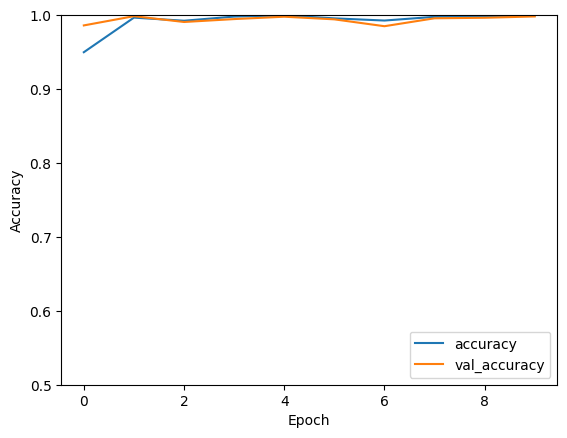

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)

In [16]:
print(test_acc)

0.9982143044471741


In [19]:
model.save('/content/drive/My Drive/A-Handelschohschule/G-Kurs/B-112-1 Kurs/E-Mikroprozessorsysteme und Schnittstellentechnik/Abschlüss/handrecognition_model.h5', save_format='h5')